# MAC0417/5768 - Visão e Processamento de Imagens (2021)

Exercício Programa 2.1 - Data augmentation

Gabriela Melo e Richard Block

Projeto GitHub: https://github.com/gabi-melo/image_processing/tree/main/EP2

Base de imagens: https://www.kaggle.com/gabrielamelo/image-processing

In [1]:
# importar bibliotecas
import skimage
from skimage import io
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from PIL import Image
import PIL.ExifTags
import cv2 as cv
import random
import pandas as pd

In [2]:
## funções

# criar função para soma de fundo com gradiente de níveis de cinza
def add_gradient_exposure(imgarr):
    x = np.linspace(0, 1, imgarr.shape[0]) # cria os valores do gradiente
    grad = np.tile(x, (imgarr.shape[1], 1)).T # replica os valores verticalmente no mesmo tamanho do input 'imgarr'
    im = imgarr + grad 
    return im/im.max() # garante que os valores dos pixels assumem valores de 0 a 1

# criar função para filtro da média implementado usando convolução
def conv_kernel(imgarr): 
    kernel = np.ones((10, 10), np.float32)/100
    return np.clip(cv.filter2D(imgarr, -1, kernel), 0, 1) # garante que os valores dos pixels assumem valores de 0 a 1

# criar função para converter grayscale de 0,1(float) para 0,255(int) para usar PIL
def change_to_255(arr): 
    return np.uint8(arr*255)

# criar função para converter array grayscale 2D em imagem do PIL
def im_from_float_array(arr):
    return Image.fromarray(change_to_255(arr), 'L')

# criar dicionário para as funções
func_dict = {
    "gray": color.rgb2gray, # RGB2Gray
    "gradient": add_gradient_exposure, # soma de fundo com gradiente de níveis de cinza
    "log": exposure.adjust_log, # logaritmo da imagem
    "gamma": lambda imgarr: exposure.adjust_gamma(imgarr, 2), # exponencial da imagem
    "conv": conv_kernel # filtro da média implementado usando convolução
}

In [ ]:
# criar diretórios para os novos datasets
os.mkdir("/Users/gabimelo/Desktop/EP2/originalGrayDataset") # originalGrayDataset
os.mkdir("/Users/gabimelo/Desktop/EP2/augmentedDataset") # augmentedDataset

**Explicações e comentários sobre as funções:**

1. **RGB2Gray**:
    Soma os três canais de cor, vermelho, verde e azul, com pesos para cada canal que aproximam a percepção humana de cores: output = 0.2125R + 0.7154G + 0.0721B. Ao final temos um array no qual cada valor representa uma intensidade na escala de cinza.
    
2. **Soma de Fundo com gradiente de níveis de cinza**:
    Essa função cria variações na iluminação da imagem, de acordo com o gradiente escolhido. Optamos por um gradiente vertical que vai do preto ao branco.
    
3. **Logaritmo da imagem**:
    Reescala os valores da imagem para o intervalo [0, 1]. Em seguida aplica-se a função output = gain\*log(1+ input). A função log desloca os valores dos pixels, aumentando a intensidade, e ajustando o contraste da imagem. "Gain" por padrão é 1; alterando esta variável, altera-se a curva log e os valores dos pixels.
    
4. **Exponencial da imagem**:
    Assim como a função log, altera o contraste das imagens. A forma como ela é implementada, com a variável "gamma", é possível deixar a imagem mais clara (gamma < 1) ou mais escura (gamma > 1). Optamos por um gamma igual a 2. Output = Input\*\*2.
    
5. **Filtro da média implementado usando convolução**:
    Aplicamos um filtro da média (kernel), por meio da função filter2D da biblioteca OpenCV que faz a convolução da imagem com o kernel. O filtro serve para suavizar a imagem, e dependendo do tamanho do kernel, a imagem fica com aparência embaçada.

In [12]:
## aplicar funções de augmentation

# selecionar todas as imagens do dataset original
for path in glob("/Users/gabimelo/Desktop/EP2/dataset/*.jpg"):
    print(path)
    
    img = Image.fromarray(io.imread(path)).resize((600, 800)) # carregar imagem colorida original e definir novas dimensões
    gray_img_2D = color.rgb2gray(np.array(img)) # aplicar função rgb2gray
    gray_img = im_from_float_array(gray_img_2D) # converter array grayscale 2D em imagem do PIL
    
    # definir novo nome para a imagem cinza
    old_name = path.split("/")[-1].replace(".jpg","")
    gray_name = old_name + "_" + "gray.jpg"
    print(gray_name)

    # salvar imagem cinza no dataset originalGrayDataset
    gray_img.save("/Users/gabimelo/Desktop/EP2/originalGrayDataset/" + gray_name)
        
    for f_name, f in func_dict.items():    
        aug_img = im_from_float_array( f(gray_img_2D) )  # aplicar cada função de augmentation do dicionário

        # definir novo nome para a imagem de acordo com a função aplicada
        old_name = path.split("/")[-1].replace(".jpg","")
        aug_name = old_name + "_" + f_name + ".jpg"
        print(aug_name)
        
        aug_img.save("/Users/gabimelo/Desktop/EP2/augmentedDataset/" + aug_name) # salvar imagem resultante no dataset augmentedDataset

/Users/gabimelo/Desktop/EP2/dataset/leite_2_noite_fora_palha_2.jpg
leite_2_noite_fora_palha_2_gray.jpg
leite_2_noite_fora_palha_2_gray.jpg
leite_2_noite_fora_palha_2_gradient.jpg
leite_2_noite_fora_palha_2_log.jpg
leite_2_noite_fora_palha_2_gamma.jpg


<ipython-input-12-90d5ab217a6b>:20: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  aug_img = im_from_float_array( f(gray_img_2D) )  # aplicar cada função de augmentation do dicionário


leite_2_noite_fora_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_3_noite_dentro_verde_3.jpg
tesoura_3_noite_dentro_verde_3_gray.jpg
tesoura_3_noite_dentro_verde_3_gray.jpg
tesoura_3_noite_dentro_verde_3_gradient.jpg
tesoura_3_noite_dentro_verde_3_log.jpg
tesoura_3_noite_dentro_verde_3_gamma.jpg
tesoura_3_noite_dentro_verde_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_3_noite_dentro_verde_3.jpg
escova_3_noite_dentro_verde_3_gray.jpg
escova_3_noite_dentro_verde_3_gray.jpg
escova_3_noite_dentro_verde_3_gradient.jpg
escova_3_noite_dentro_verde_3_log.jpg
escova_3_noite_dentro_verde_3_gamma.jpg
escova_3_noite_dentro_verde_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_1_noite_fora_vermelho_2.jpg
tesoura_1_noite_fora_vermelho_2_gray.jpg
tesoura_1_noite_fora_vermelho_2_gray.jpg
tesoura_1_noite_fora_vermelho_2_gradient.jpg
tesoura_1_noite_fora_vermelho_2_log.jpg
tesoura_1_noite_fora_vermelho_2_gamma.jpg
tesoura_1_noite_fora_vermelho_2_conv.jpg
/Users/gabimelo/Des

livro_2_dia_dentro_madeira_1_gray.jpg
livro_2_dia_dentro_madeira_1_gray.jpg
livro_2_dia_dentro_madeira_1_gradient.jpg
livro_2_dia_dentro_madeira_1_log.jpg
livro_2_dia_dentro_madeira_1_gamma.jpg
livro_2_dia_dentro_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_3_dia_fora_palha_1.jpg
copo_3_dia_fora_palha_1_gray.jpg
copo_3_dia_fora_palha_1_gray.jpg
copo_3_dia_fora_palha_1_gradient.jpg
copo_3_dia_fora_palha_1_log.jpg
copo_3_dia_fora_palha_1_gamma.jpg
copo_3_dia_fora_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_2_noite_fora_bege_2.jpg
escova_2_noite_fora_bege_2_gray.jpg
escova_2_noite_fora_bege_2_gray.jpg
escova_2_noite_fora_bege_2_gradient.jpg
escova_2_noite_fora_bege_2_log.jpg
escova_2_noite_fora_bege_2_gamma.jpg
escova_2_noite_fora_bege_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_2_noite_fora_bege_3.jpg
palheta_2_noite_fora_bege_3_gray.jpg
palheta_2_noite_fora_bege_3_gray.jpg
palheta_2_noite_fora_bege_3_gradient.jpg
palheta_2_noite_fora_bege_3_log.

escova_3_noite_dentro_verde_2_gray.jpg
escova_3_noite_dentro_verde_2_gray.jpg
escova_3_noite_dentro_verde_2_gradient.jpg
escova_3_noite_dentro_verde_2_log.jpg
escova_3_noite_dentro_verde_2_gamma.jpg
escova_3_noite_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_3_dia_dentro_pano_3.jpg
leite_3_dia_dentro_pano_3_gray.jpg
leite_3_dia_dentro_pano_3_gray.jpg
leite_3_dia_dentro_pano_3_gradient.jpg
leite_3_dia_dentro_pano_3_log.jpg
leite_3_dia_dentro_pano_3_gamma.jpg
leite_3_dia_dentro_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_2_noite_fora_palha_3.jpg
leite_2_noite_fora_palha_3_gray.jpg
leite_2_noite_fora_palha_3_gray.jpg
leite_2_noite_fora_palha_3_gradient.jpg
leite_2_noite_fora_palha_3_log.jpg
leite_2_noite_fora_palha_3_gamma.jpg
leite_2_noite_fora_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_3_noite_dentro_verde_2.jpg
tesoura_3_noite_dentro_verde_2_gray.jpg
tesoura_3_noite_dentro_verde_2_gray.jpg
tesoura_3_noite_dentro_verde_2_gradient.jpg


livro_2_noite_dentro_pano_1_gray.jpg
livro_2_noite_dentro_pano_1_gray.jpg
livro_2_noite_dentro_pano_1_gradient.jpg
livro_2_noite_dentro_pano_1_log.jpg
livro_2_noite_dentro_pano_1_gamma.jpg
livro_2_noite_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_dentro_madeira_1.jpg
chave_1_noite_dentro_madeira_1_gray.jpg
chave_1_noite_dentro_madeira_1_gray.jpg
chave_1_noite_dentro_madeira_1_gradient.jpg
chave_1_noite_dentro_madeira_1_log.jpg
chave_1_noite_dentro_madeira_1_gamma.jpg
chave_1_noite_dentro_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_noite_fora_madeira_3.jpg
caneta_2_noite_fora_madeira_3_gray.jpg
caneta_2_noite_fora_madeira_3_gray.jpg
caneta_2_noite_fora_madeira_3_gradient.jpg
caneta_2_noite_fora_madeira_3_log.jpg
caneta_2_noite_fora_madeira_3_gamma.jpg
caneta_2_noite_fora_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_3_dia_fora_palha_3.jpg
copo_3_dia_fora_palha_3_gray.jpg
copo_3_dia_fora_palha_3_gray.jpg
copo_3_dia_fora_palha

palheta_3_noite_dentro_verde_2_gray.jpg
palheta_3_noite_dentro_verde_2_gray.jpg
palheta_3_noite_dentro_verde_2_gradient.jpg
palheta_3_noite_dentro_verde_2_log.jpg
palheta_3_noite_dentro_verde_2_gamma.jpg
palheta_3_noite_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_3_noite_dentro_pano_3.jpg
copo_3_noite_dentro_pano_3_gray.jpg
copo_3_noite_dentro_pano_3_gray.jpg
copo_3_noite_dentro_pano_3_gradient.jpg
copo_3_noite_dentro_pano_3_log.jpg
copo_3_noite_dentro_pano_3_gamma.jpg
copo_3_noite_dentro_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_1_dia_fora_madeira_2.jpg
leite_1_dia_fora_madeira_2_gray.jpg
leite_1_dia_fora_madeira_2_gray.jpg
leite_1_dia_fora_madeira_2_gradient.jpg
leite_1_dia_fora_madeira_2_log.jpg
leite_1_dia_fora_madeira_2_gamma.jpg
leite_1_dia_fora_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_2_dia_dentro_laranja_2.jpg
chinelo_2_dia_dentro_laranja_2_gray.jpg
chinelo_2_dia_dentro_laranja_2_gray.jpg
chinelo_2_dia_dentro_laranja_2_

copo_3_noite_fora_pano_1_gray.jpg
copo_3_noite_fora_pano_1_gray.jpg
copo_3_noite_fora_pano_1_gradient.jpg
copo_3_noite_fora_pano_1_log.jpg
copo_3_noite_fora_pano_1_gamma.jpg
copo_3_noite_fora_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_3_noite_fora_vermelho_1.jpg
escova_3_noite_fora_vermelho_1_gray.jpg
escova_3_noite_fora_vermelho_1_gray.jpg
escova_3_noite_fora_vermelho_1_gradient.jpg
escova_3_noite_fora_vermelho_1_log.jpg
escova_3_noite_fora_vermelho_1_gamma.jpg
escova_3_noite_fora_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_2_dia_fora_vermelho_1.jpg
palheta_2_dia_fora_vermelho_1_gray.jpg
palheta_2_dia_fora_vermelho_1_gray.jpg
palheta_2_dia_fora_vermelho_1_gradient.jpg
palheta_2_dia_fora_vermelho_1_log.jpg
palheta_2_dia_fora_vermelho_1_gamma.jpg
palheta_2_dia_fora_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_dia_fora_palha_1.jpg
caneta_2_dia_fora_palha_1_gray.jpg
caneta_2_dia_fora_palha_1_gray.jpg
caneta_2_dia_fora_palha_1_gradien

livro_3_noite_dentro_palha_1_gray.jpg
livro_3_noite_dentro_palha_1_gray.jpg
livro_3_noite_dentro_palha_1_gradient.jpg
livro_3_noite_dentro_palha_1_log.jpg
livro_3_noite_dentro_palha_1_gamma.jpg
livro_3_noite_dentro_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_dia_fora_pano_2.jpg
livro_1_dia_fora_pano_2_gray.jpg
livro_1_dia_fora_pano_2_gray.jpg
livro_1_dia_fora_pano_2_gradient.jpg
livro_1_dia_fora_pano_2_log.jpg
livro_1_dia_fora_pano_2_gamma.jpg
livro_1_dia_fora_pano_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_1_noite_fora_azul_3.jpg
tesoura_1_noite_fora_azul_3_gray.jpg
tesoura_1_noite_fora_azul_3_gray.jpg
tesoura_1_noite_fora_azul_3_gradient.jpg
tesoura_1_noite_fora_azul_3_log.jpg
tesoura_1_noite_fora_azul_3_gamma.jpg
tesoura_1_noite_fora_azul_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_2_dia_dentro_laranja_2.jpg
oculos_2_dia_dentro_laranja_2_gray.jpg
oculos_2_dia_dentro_laranja_2_gray.jpg
oculos_2_dia_dentro_laranja_2_gradient.jpg
oculos_2_dia_dent

escova_2_noite_fora_azul_3_gray.jpg
escova_2_noite_fora_azul_3_gray.jpg
escova_2_noite_fora_azul_3_gradient.jpg
escova_2_noite_fora_azul_3_log.jpg
escova_2_noite_fora_azul_3_gamma.jpg
escova_2_noite_fora_azul_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_3_dia_fora_vermelho_2.jpg
escova_3_dia_fora_vermelho_2_gray.jpg
escova_3_dia_fora_vermelho_2_gray.jpg
escova_3_dia_fora_vermelho_2_gradient.jpg
escova_3_dia_fora_vermelho_2_log.jpg
escova_3_dia_fora_vermelho_2_gamma.jpg
escova_3_dia_fora_vermelho_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_3_dia_fora_pano_3.jpg
livro_3_dia_fora_pano_3_gray.jpg
livro_3_dia_fora_pano_3_gray.jpg
livro_3_dia_fora_pano_3_gradient.jpg
livro_3_dia_fora_pano_3_log.jpg
livro_3_dia_fora_pano_3_gamma.jpg
livro_3_dia_fora_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_3_noite_fora_bege_3.jpg
tesoura_3_noite_fora_bege_3_gray.jpg
tesoura_3_noite_fora_bege_3_gray.jpg
tesoura_3_noite_fora_bege_3_gradient.jpg
tesoura_3_noite_fora_bege_3_lo

oculos_3_noite_fora_vermelho_2_gray.jpg
oculos_3_noite_fora_vermelho_2_gray.jpg
oculos_3_noite_fora_vermelho_2_gradient.jpg
oculos_3_noite_fora_vermelho_2_log.jpg
oculos_3_noite_fora_vermelho_2_gamma.jpg
oculos_3_noite_fora_vermelho_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_1_noite_dentro_pano_1.jpg
leite_1_noite_dentro_pano_1_gray.jpg
leite_1_noite_dentro_pano_1_gray.jpg
leite_1_noite_dentro_pano_1_gradient.jpg
leite_1_noite_dentro_pano_1_log.jpg
leite_1_noite_dentro_pano_1_gamma.jpg
leite_1_noite_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_3_dia_fora_palha_3.jpg
livro_3_dia_fora_palha_3_gray.jpg
livro_3_dia_fora_palha_3_gray.jpg
livro_3_dia_fora_palha_3_gradient.jpg
livro_3_dia_fora_palha_3_log.jpg
livro_3_dia_fora_palha_3_gamma.jpg
livro_3_dia_fora_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_dentro_palha_3.jpg
chave_1_noite_dentro_palha_3_gray.jpg
chave_1_noite_dentro_palha_3_gray.jpg
chave_1_noite_dentro_palha_3_gradient.jpg
ch

leite_2_noite_dentro_palha_1_gray.jpg
leite_2_noite_dentro_palha_1_gray.jpg
leite_2_noite_dentro_palha_1_gradient.jpg
leite_2_noite_dentro_palha_1_log.jpg
leite_2_noite_dentro_palha_1_gamma.jpg
leite_2_noite_dentro_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_1_noite_dentro_vermelho_1.jpg
escova_1_noite_dentro_vermelho_1_gray.jpg
escova_1_noite_dentro_vermelho_1_gray.jpg
escova_1_noite_dentro_vermelho_1_gradient.jpg
escova_1_noite_dentro_vermelho_1_log.jpg
escova_1_noite_dentro_vermelho_1_gamma.jpg
escova_1_noite_dentro_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_dentro_pano_3.jpg
chave_1_noite_dentro_pano_3_gray.jpg
chave_1_noite_dentro_pano_3_gray.jpg
chave_1_noite_dentro_pano_3_gradient.jpg
chave_1_noite_dentro_pano_3_log.jpg
chave_1_noite_dentro_pano_3_gamma.jpg
chave_1_noite_dentro_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_2_dia_fora_palha_3.jpg
copo_2_dia_fora_palha_3_gray.jpg
copo_2_dia_fora_palha_3_gray.jpg
copo_2_dia_fora

copo_1_noite_fora_madeira_1_gray.jpg
copo_1_noite_fora_madeira_1_gray.jpg
copo_1_noite_fora_madeira_1_gradient.jpg
copo_1_noite_fora_madeira_1_log.jpg
copo_1_noite_fora_madeira_1_gamma.jpg
copo_1_noite_fora_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_dia_fora_madeira_1.jpg
livro_1_dia_fora_madeira_1_gray.jpg
livro_1_dia_fora_madeira_1_gray.jpg
livro_1_dia_fora_madeira_1_gradient.jpg
livro_1_dia_fora_madeira_1_log.jpg
livro_1_dia_fora_madeira_1_gamma.jpg
livro_1_dia_fora_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_2_noite_dentro_pano_1.jpg
leite_2_noite_dentro_pano_1_gray.jpg
leite_2_noite_dentro_pano_1_gray.jpg
leite_2_noite_dentro_pano_1_gradient.jpg
leite_2_noite_dentro_pano_1_log.jpg
leite_2_noite_dentro_pano_1_gamma.jpg
leite_2_noite_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_1_noite_dentro_madeira_3.jpg
leite_1_noite_dentro_madeira_3_gray.jpg
leite_1_noite_dentro_madeira_3_gray.jpg
leite_1_noite_dentro_madeira_3_gradient.jp

copo_3_dia_dentro_madeira_1_gray.jpg
copo_3_dia_dentro_madeira_1_gray.jpg
copo_3_dia_dentro_madeira_1_gradient.jpg
copo_3_dia_dentro_madeira_1_log.jpg
copo_3_dia_dentro_madeira_1_gamma.jpg
copo_3_dia_dentro_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_3_noite_fora_pano_3.jpg
leite_3_noite_fora_pano_3_gray.jpg
leite_3_noite_fora_pano_3_gray.jpg
leite_3_noite_fora_pano_3_gradient.jpg
leite_3_noite_fora_pano_3_log.jpg
leite_3_noite_fora_pano_3_gamma.jpg
leite_3_noite_fora_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_3_noite_dentro_palha_1.jpg
leite_3_noite_dentro_palha_1_gray.jpg
leite_3_noite_dentro_palha_1_gray.jpg
leite_3_noite_dentro_palha_1_gradient.jpg
leite_3_noite_dentro_palha_1_log.jpg
leite_3_noite_dentro_palha_1_gamma.jpg
leite_3_noite_dentro_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_1_noite_fora_bege_2.jpg
oculos_1_noite_fora_bege_2_gray.jpg
oculos_1_noite_fora_bege_2_gray.jpg
oculos_1_noite_fora_bege_2_gradient.jpg
oculos_1_noite

livro_2_noite_fora_palha_1_gray.jpg
livro_2_noite_fora_palha_1_gray.jpg
livro_2_noite_fora_palha_1_gradient.jpg
livro_2_noite_fora_palha_1_log.jpg
livro_2_noite_fora_palha_1_gamma.jpg
livro_2_noite_fora_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_2_noite_dentro_palha_3.jpg
livro_2_noite_dentro_palha_3_gray.jpg
livro_2_noite_dentro_palha_3_gray.jpg
livro_2_noite_dentro_palha_3_gradient.jpg
livro_2_noite_dentro_palha_3_log.jpg
livro_2_noite_dentro_palha_3_gamma.jpg
livro_2_noite_dentro_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_2_noite_dentro_laranja_3.jpg
tesoura_2_noite_dentro_laranja_3_gray.jpg
tesoura_2_noite_dentro_laranja_3_gray.jpg
tesoura_2_noite_dentro_laranja_3_gradient.jpg
tesoura_2_noite_dentro_laranja_3_log.jpg
tesoura_2_noite_dentro_laranja_3_gamma.jpg
tesoura_2_noite_dentro_laranja_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_2_dia_dentro_pano_1.jpg
livro_2_dia_dentro_pano_1_gray.jpg
livro_2_dia_dentro_pano_1_gray.jpg
livro_2_dia_de

escova_2_noite_dentro_verde_2_gray.jpg
escova_2_noite_dentro_verde_2_gray.jpg
escova_2_noite_dentro_verde_2_gradient.jpg
escova_2_noite_dentro_verde_2_log.jpg
escova_2_noite_dentro_verde_2_gamma.jpg
escova_2_noite_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_noite_fora_madeira_2.jpg
livro_1_noite_fora_madeira_2_gray.jpg
livro_1_noite_fora_madeira_2_gray.jpg
livro_1_noite_fora_madeira_2_gradient.jpg
livro_1_noite_fora_madeira_2_log.jpg
livro_1_noite_fora_madeira_2_gamma.jpg
livro_1_noite_fora_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_2_noite_dentro_verde_2.jpg
tesoura_2_noite_dentro_verde_2_gray.jpg
tesoura_2_noite_dentro_verde_2_gray.jpg
tesoura_2_noite_dentro_verde_2_gradient.jpg
tesoura_2_noite_dentro_verde_2_log.jpg
tesoura_2_noite_dentro_verde_2_gamma.jpg
tesoura_2_noite_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_1_noite_fora_vermelho_1.jpg
escova_1_noite_fora_vermelho_1_gray.jpg
escova_1_noite_fora_vermelho_1_gray

caneta_1_dia_fora_pano_3_gray.jpg
caneta_1_dia_fora_pano_3_gray.jpg
caneta_1_dia_fora_pano_3_gradient.jpg
caneta_1_dia_fora_pano_3_log.jpg
caneta_1_dia_fora_pano_3_gamma.jpg
caneta_1_dia_fora_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_1_noite_dentro_laranja_1.jpg
palheta_1_noite_dentro_laranja_1_gray.jpg
palheta_1_noite_dentro_laranja_1_gray.jpg
palheta_1_noite_dentro_laranja_1_gradient.jpg
palheta_1_noite_dentro_laranja_1_log.jpg
palheta_1_noite_dentro_laranja_1_gamma.jpg
palheta_1_noite_dentro_laranja_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_1_noite_fora_azul_3.jpg
oculos_1_noite_fora_azul_3_gray.jpg
oculos_1_noite_fora_azul_3_gray.jpg
oculos_1_noite_fora_azul_3_gradient.jpg
oculos_1_noite_fora_azul_3_log.jpg
oculos_1_noite_fora_azul_3_gamma.jpg
oculos_1_noite_fora_azul_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_2_noite_fora_bege_1.jpg
chinelo_2_noite_fora_bege_1_gray.jpg
chinelo_2_noite_fora_bege_1_gray.jpg
chinelo_2_noite_fora_bege_1_gradie

escova_2_noite_dentro_verde_3_gray.jpg
escova_2_noite_dentro_verde_3_gray.jpg
escova_2_noite_dentro_verde_3_gradient.jpg
escova_2_noite_dentro_verde_3_log.jpg
escova_2_noite_dentro_verde_3_gamma.jpg
escova_2_noite_dentro_verde_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_2_dia_fora_madeira_3.jpg
livro_2_dia_fora_madeira_3_gray.jpg
livro_2_dia_fora_madeira_3_gray.jpg
livro_2_dia_fora_madeira_3_gradient.jpg
livro_2_dia_fora_madeira_3_log.jpg
livro_2_dia_fora_madeira_3_gamma.jpg
livro_2_dia_fora_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_1_dia_dentro_madeira_3.jpg
caneta_1_dia_dentro_madeira_3_gray.jpg
caneta_1_dia_dentro_madeira_3_gray.jpg
caneta_1_dia_dentro_madeira_3_gradient.jpg
caneta_1_dia_dentro_madeira_3_log.jpg
caneta_1_dia_dentro_madeira_3_gamma.jpg
caneta_1_dia_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_3_noite_fora_madeira_2.jpg
chave_3_noite_fora_madeira_2_gray.jpg
chave_3_noite_fora_madeira_2_gray.jpg
chave_3_noite_fora_mad

oculos_1_noite_fora_vermelho_3_gray.jpg
oculos_1_noite_fora_vermelho_3_gray.jpg
oculos_1_noite_fora_vermelho_3_gradient.jpg
oculos_1_noite_fora_vermelho_3_log.jpg
oculos_1_noite_fora_vermelho_3_gamma.jpg
oculos_1_noite_fora_vermelho_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_3_dia_dentro_palha_2.jpg
chave_3_dia_dentro_palha_2_gray.jpg
chave_3_dia_dentro_palha_2_gray.jpg
chave_3_dia_dentro_palha_2_gradient.jpg
chave_3_dia_dentro_palha_2_log.jpg
chave_3_dia_dentro_palha_2_gamma.jpg
chave_3_dia_dentro_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_1_dia_fora_palha_3.jpg
leite_1_dia_fora_palha_3_gray.jpg
leite_1_dia_fora_palha_3_gray.jpg
leite_1_dia_fora_palha_3_gradient.jpg
leite_1_dia_fora_palha_3_log.jpg
leite_1_dia_fora_palha_3_gamma.jpg
leite_1_dia_fora_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_dia_fora_pano_3.jpg
caneta_2_dia_fora_pano_3_gray.jpg
caneta_2_dia_fora_pano_3_gray.jpg
caneta_2_dia_fora_pano_3_gradient.jpg
caneta_2_dia_fora_pano_3_

caneta_2_dia_dentro_pano_1_gray.jpg
caneta_2_dia_dentro_pano_1_gray.jpg
caneta_2_dia_dentro_pano_1_gradient.jpg
caneta_2_dia_dentro_pano_1_log.jpg
caneta_2_dia_dentro_pano_1_gamma.jpg
caneta_2_dia_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_1_noite_fora_vermelho_2.jpg
oculos_1_noite_fora_vermelho_2_gray.jpg
oculos_1_noite_fora_vermelho_2_gray.jpg
oculos_1_noite_fora_vermelho_2_gradient.jpg
oculos_1_noite_fora_vermelho_2_log.jpg
oculos_1_noite_fora_vermelho_2_gamma.jpg
oculos_1_noite_fora_vermelho_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_2_noite_dentro_madeira_3.jpg
copo_2_noite_dentro_madeira_3_gray.jpg
copo_2_noite_dentro_madeira_3_gray.jpg
copo_2_noite_dentro_madeira_3_gradient.jpg
copo_2_noite_dentro_madeira_3_log.jpg
copo_2_noite_dentro_madeira_3_gamma.jpg
copo_2_noite_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_3_dia_dentro_palha_3.jpg
chave_3_dia_dentro_palha_3_gray.jpg
chave_3_dia_dentro_palha_3_gray.jpg
chave_3_dia_dentro

tesoura_3_dia_dentro_verde_2_gray.jpg
tesoura_3_dia_dentro_verde_2_gray.jpg
tesoura_3_dia_dentro_verde_2_gradient.jpg
tesoura_3_dia_dentro_verde_2_log.jpg
tesoura_3_dia_dentro_verde_2_gamma.jpg
tesoura_3_dia_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_fora_palha_1.jpg
chave_1_noite_fora_palha_1_gray.jpg
chave_1_noite_fora_palha_1_gray.jpg
chave_1_noite_fora_palha_1_gradient.jpg
chave_1_noite_fora_palha_1_log.jpg
chave_1_noite_fora_palha_1_gamma.jpg
chave_1_noite_fora_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_noite_dentro_madeira_3.jpg
caneta_2_noite_dentro_madeira_3_gray.jpg
caneta_2_noite_dentro_madeira_3_gray.jpg
caneta_2_noite_dentro_madeira_3_gradient.jpg
caneta_2_noite_dentro_madeira_3_log.jpg
caneta_2_noite_dentro_madeira_3_gamma.jpg
caneta_2_noite_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_2_dia_fora_pano_2.jpg
chave_2_dia_fora_pano_2_gray.jpg
chave_2_dia_fora_pano_2_gray.jpg
chave_2_dia_fora_pano_2_gradi

oculos_3_noite_dentro_vermelho_3_gray.jpg
oculos_3_noite_dentro_vermelho_3_gray.jpg
oculos_3_noite_dentro_vermelho_3_gradient.jpg
oculos_3_noite_dentro_vermelho_3_log.jpg
oculos_3_noite_dentro_vermelho_3_gamma.jpg
oculos_3_noite_dentro_vermelho_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_2_dia_fora_azul_1.jpg
oculos_2_dia_fora_azul_1_gray.jpg
oculos_2_dia_fora_azul_1_gray.jpg
oculos_2_dia_fora_azul_1_gradient.jpg
oculos_2_dia_fora_azul_1_log.jpg
oculos_2_dia_fora_azul_1_gamma.jpg
oculos_2_dia_fora_azul_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_2_noite_dentro_palha_3.jpg
chave_2_noite_dentro_palha_3_gray.jpg
chave_2_noite_dentro_palha_3_gray.jpg
chave_2_noite_dentro_palha_3_gradient.jpg
chave_2_noite_dentro_palha_3_log.jpg
chave_2_noite_dentro_palha_3_gamma.jpg
chave_2_noite_dentro_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_1_dia_dentro_verde_3.jpg
chinelo_1_dia_dentro_verde_3_gray.jpg
chinelo_1_dia_dentro_verde_3_gray.jpg
chinelo_1_dia_dentro_verd

leite_1_noite_dentro_palha_1_gray.jpg
leite_1_noite_dentro_palha_1_gray.jpg
leite_1_noite_dentro_palha_1_gradient.jpg
leite_1_noite_dentro_palha_1_log.jpg
leite_1_noite_dentro_palha_1_gamma.jpg
leite_1_noite_dentro_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_noite_dentro_madeira_2.jpg
caneta_2_noite_dentro_madeira_2_gray.jpg
caneta_2_noite_dentro_madeira_2_gray.jpg
caneta_2_noite_dentro_madeira_2_gradient.jpg
caneta_2_noite_dentro_madeira_2_log.jpg
caneta_2_noite_dentro_madeira_2_gamma.jpg
caneta_2_noite_dentro_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_1_dia_dentro_laranja_1.jpg
oculos_1_dia_dentro_laranja_1_gray.jpg
oculos_1_dia_dentro_laranja_1_gray.jpg
oculos_1_dia_dentro_laranja_1_gradient.jpg
oculos_1_dia_dentro_laranja_1_log.jpg
oculos_1_dia_dentro_laranja_1_gamma.jpg
oculos_1_dia_dentro_laranja_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_3_noite_dentro_madeira_2.jpg
leite_3_noite_dentro_madeira_2_gray.jpg
leite_3_noite_dentro_madeir

oculos_3_dia_fora_azul_2_gray.jpg
oculos_3_dia_fora_azul_2_gray.jpg
oculos_3_dia_fora_azul_2_gradient.jpg
oculos_3_dia_fora_azul_2_log.jpg
oculos_3_dia_fora_azul_2_gamma.jpg
oculos_3_dia_fora_azul_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_3_noite_fora_bege_3.jpg
escova_3_noite_fora_bege_3_gray.jpg
escova_3_noite_fora_bege_3_gray.jpg
escova_3_noite_fora_bege_3_gradient.jpg
escova_3_noite_fora_bege_3_log.jpg
escova_3_noite_fora_bege_3_gamma.jpg
escova_3_noite_fora_bege_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_3_noite_fora_bege_2.jpg
palheta_3_noite_fora_bege_2_gray.jpg
palheta_3_noite_fora_bege_2_gray.jpg
palheta_3_noite_fora_bege_2_gradient.jpg
palheta_3_noite_fora_bege_2_log.jpg
palheta_3_noite_fora_bege_2_gamma.jpg
palheta_3_noite_fora_bege_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_2_dia_fora_palha_1.jpg
leite_2_dia_fora_palha_1_gray.jpg
leite_2_dia_fora_palha_1_gray.jpg
leite_2_dia_fora_palha_1_gradient.jpg
leite_2_dia_fora_palha_1_log.jpg
leite_2

livro_1_dia_fora_palha_2_gray.jpg
livro_1_dia_fora_palha_2_gray.jpg
livro_1_dia_fora_palha_2_gradient.jpg
livro_1_dia_fora_palha_2_log.jpg
livro_1_dia_fora_palha_2_gamma.jpg
livro_1_dia_fora_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_1_dia_dentro_palha_2.jpg
leite_1_dia_dentro_palha_2_gray.jpg
leite_1_dia_dentro_palha_2_gray.jpg
leite_1_dia_dentro_palha_2_gradient.jpg
leite_1_dia_dentro_palha_2_log.jpg
leite_1_dia_dentro_palha_2_gamma.jpg
leite_1_dia_dentro_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_3_noite_fora_bege_3.jpg
palheta_3_noite_fora_bege_3_gray.jpg
palheta_3_noite_fora_bege_3_gray.jpg
palheta_3_noite_fora_bege_3_gradient.jpg
palheta_3_noite_fora_bege_3_log.jpg
palheta_3_noite_fora_bege_3_gamma.jpg
palheta_3_noite_fora_bege_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_2_dia_fora_vermelho_1.jpg
escova_2_dia_fora_vermelho_1_gray.jpg
escova_2_dia_fora_vermelho_1_gray.jpg
escova_2_dia_fora_vermelho_1_gradient.jpg
escova_2_dia_fora_vermel

palheta_3_noite_dentro_laranja_1_gray.jpg
palheta_3_noite_dentro_laranja_1_gray.jpg
palheta_3_noite_dentro_laranja_1_gradient.jpg
palheta_3_noite_dentro_laranja_1_log.jpg
palheta_3_noite_dentro_laranja_1_gamma.jpg
palheta_3_noite_dentro_laranja_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_3_noite_fora_pano_2.jpg
caneta_3_noite_fora_pano_2_gray.jpg
caneta_3_noite_fora_pano_2_gray.jpg
caneta_3_noite_fora_pano_2_gradient.jpg
caneta_3_noite_fora_pano_2_log.jpg
caneta_3_noite_fora_pano_2_gamma.jpg
caneta_3_noite_fora_pano_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_2_dia_fora_bege_3.jpg
oculos_2_dia_fora_bege_3_gray.jpg
oculos_2_dia_fora_bege_3_gray.jpg
oculos_2_dia_fora_bege_3_gradient.jpg
oculos_2_dia_fora_bege_3_log.jpg
oculos_2_dia_fora_bege_3_gamma.jpg
oculos_2_dia_fora_bege_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_2_dia_dentro_laranja_1.jpg
palheta_2_dia_dentro_laranja_1_gray.jpg
palheta_2_dia_dentro_laranja_1_gray.jpg
palheta_2_dia_dentro_laranja_1_gr

escova_1_noite_fora_bege_1_gray.jpg
escova_1_noite_fora_bege_1_gray.jpg
escova_1_noite_fora_bege_1_gradient.jpg
escova_1_noite_fora_bege_1_log.jpg
escova_1_noite_fora_bege_1_gamma.jpg
escova_1_noite_fora_bege_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_3_dia_fora_bege_2.jpg
oculos_3_dia_fora_bege_2_gray.jpg
oculos_3_dia_fora_bege_2_gray.jpg
oculos_3_dia_fora_bege_2_gradient.jpg
oculos_3_dia_fora_bege_2_log.jpg
oculos_3_dia_fora_bege_2_gamma.jpg
oculos_3_dia_fora_bege_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_dia_dentro_madeira_3.jpg
livro_1_dia_dentro_madeira_3_gray.jpg
livro_1_dia_dentro_madeira_3_gray.jpg
livro_1_dia_dentro_madeira_3_gradient.jpg
livro_1_dia_dentro_madeira_3_log.jpg
livro_1_dia_dentro_madeira_3_gamma.jpg
livro_1_dia_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_noite_fora_pano_3.jpg
livro_1_noite_fora_pano_3_gray.jpg
livro_1_noite_fora_pano_3_gray.jpg
livro_1_noite_fora_pano_3_gradient.jpg
livro_1_noite_fora_pano_3_log.j

chave_3_dia_dentro_madeira_3_gray.jpg
chave_3_dia_dentro_madeira_3_gray.jpg
chave_3_dia_dentro_madeira_3_gradient.jpg
chave_3_dia_dentro_madeira_3_log.jpg
chave_3_dia_dentro_madeira_3_gamma.jpg
chave_3_dia_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_noite_dentro_madeira_1.jpg
livro_1_noite_dentro_madeira_1_gray.jpg
livro_1_noite_dentro_madeira_1_gray.jpg
livro_1_noite_dentro_madeira_1_gradient.jpg
livro_1_noite_dentro_madeira_1_log.jpg
livro_1_noite_dentro_madeira_1_gamma.jpg
livro_1_noite_dentro_madeira_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_2_noite_fora_vermelho_1.jpg
tesoura_2_noite_fora_vermelho_1_gray.jpg
tesoura_2_noite_fora_vermelho_1_gray.jpg
tesoura_2_noite_fora_vermelho_1_gradient.jpg
tesoura_2_noite_fora_vermelho_1_log.jpg
tesoura_2_noite_fora_vermelho_1_gamma.jpg
tesoura_2_noite_fora_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_2_noite_fora_palha_3.jpg
chave_2_noite_fora_palha_3_gray.jpg
chave_2_noite_fora_palha_3_g

palheta_3_dia_dentro_verde_3_gray.jpg
palheta_3_dia_dentro_verde_3_gray.jpg
palheta_3_dia_dentro_verde_3_gradient.jpg
palheta_3_dia_dentro_verde_3_log.jpg
palheta_3_dia_dentro_verde_3_gamma.jpg
palheta_3_dia_dentro_verde_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_3_dia_fora_pano_3.jpg
copo_3_dia_fora_pano_3_gray.jpg
copo_3_dia_fora_pano_3_gray.jpg
copo_3_dia_fora_pano_3_gradient.jpg
copo_3_dia_fora_pano_3_log.jpg
copo_3_dia_fora_pano_3_gamma.jpg
copo_3_dia_fora_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_2_dia_dentro_laranja_2.jpg
palheta_2_dia_dentro_laranja_2_gray.jpg
palheta_2_dia_dentro_laranja_2_gray.jpg
palheta_2_dia_dentro_laranja_2_gradient.jpg
palheta_2_dia_dentro_laranja_2_log.jpg
palheta_2_dia_dentro_laranja_2_gamma.jpg
palheta_2_dia_dentro_laranja_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_3_noite_fora_madeira_3.jpg
livro_3_noite_fora_madeira_3_gray.jpg
livro_3_noite_fora_madeira_3_gray.jpg
livro_3_noite_fora_madeira_3_gradient.jpg
livro_3

palheta_2_dia_fora_bege_3_gray.jpg
palheta_2_dia_fora_bege_3_gray.jpg
palheta_2_dia_fora_bege_3_gradient.jpg
palheta_2_dia_fora_bege_3_log.jpg
palheta_2_dia_fora_bege_3_gamma.jpg
palheta_2_dia_fora_bege_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_1_dia_fora_palha_2.jpg
copo_1_dia_fora_palha_2_gray.jpg
copo_1_dia_fora_palha_2_gray.jpg
copo_1_dia_fora_palha_2_gradient.jpg
copo_1_dia_fora_palha_2_log.jpg
copo_1_dia_fora_palha_2_gamma.jpg
copo_1_dia_fora_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_dia_fora_madeira_3.jpg
chave_1_dia_fora_madeira_3_gray.jpg
chave_1_dia_fora_madeira_3_gray.jpg
chave_1_dia_fora_madeira_3_gradient.jpg
chave_1_dia_fora_madeira_3_log.jpg
chave_1_dia_fora_madeira_3_gamma.jpg
chave_1_dia_fora_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_3_dia_fora_azul_3.jpg
tesoura_3_dia_fora_azul_3_gray.jpg
tesoura_3_dia_fora_azul_3_gray.jpg
tesoura_3_dia_fora_azul_3_gradient.jpg
tesoura_3_dia_fora_azul_3_log.jpg
tesoura_3_dia_fora_azul_

caneta_3_dia_dentro_madeira_2_gray.jpg
caneta_3_dia_dentro_madeira_2_gray.jpg
caneta_3_dia_dentro_madeira_2_gradient.jpg
caneta_3_dia_dentro_madeira_2_log.jpg
caneta_3_dia_dentro_madeira_2_gamma.jpg
caneta_3_dia_dentro_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_3_noite_fora_vermelho_1.jpg
palheta_3_noite_fora_vermelho_1_gray.jpg
palheta_3_noite_fora_vermelho_1_gray.jpg
palheta_3_noite_fora_vermelho_1_gradient.jpg
palheta_3_noite_fora_vermelho_1_log.jpg
palheta_3_noite_fora_vermelho_1_gamma.jpg
palheta_3_noite_fora_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_fora_madeira_3.jpg
chave_1_noite_fora_madeira_3_gray.jpg
chave_1_noite_fora_madeira_3_gray.jpg
chave_1_noite_fora_madeira_3_gradient.jpg
chave_1_noite_fora_madeira_3_log.jpg
chave_1_noite_fora_madeira_3_gamma.jpg
chave_1_noite_fora_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_3_noite_dentro_verde_3.jpg
chinelo_3_noite_dentro_verde_3_gray.jpg
chinelo_3_noite_dentro_verde

chave_3_noite_dentro_madeira_3_gray.jpg
chave_3_noite_dentro_madeira_3_gray.jpg
chave_3_noite_dentro_madeira_3_gradient.jpg
chave_3_noite_dentro_madeira_3_log.jpg
chave_3_noite_dentro_madeira_3_gamma.jpg
chave_3_noite_dentro_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_dia_dentro_palha_1.jpg
livro_1_dia_dentro_palha_1_gray.jpg
livro_1_dia_dentro_palha_1_gray.jpg
livro_1_dia_dentro_palha_1_gradient.jpg
livro_1_dia_dentro_palha_1_log.jpg
livro_1_dia_dentro_palha_1_gamma.jpg
livro_1_dia_dentro_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_3_dia_fora_palha_1.jpg
chave_3_dia_fora_palha_1_gray.jpg
chave_3_dia_fora_palha_1_gray.jpg
chave_3_dia_fora_palha_1_gradient.jpg
chave_3_dia_fora_palha_1_log.jpg
chave_3_dia_fora_palha_1_gamma.jpg
chave_3_dia_fora_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_3_dia_dentro_verde_3.jpg
chinelo_3_dia_dentro_verde_3_gray.jpg
chinelo_3_dia_dentro_verde_3_gray.jpg
chinelo_3_dia_dentro_verde_3_gradient.jpg
chinelo_3

leite_3_noite_fora_madeira_2_gray.jpg
leite_3_noite_fora_madeira_2_gray.jpg
leite_3_noite_fora_madeira_2_gradient.jpg
leite_3_noite_fora_madeira_2_log.jpg
leite_3_noite_fora_madeira_2_gamma.jpg
leite_3_noite_fora_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_1_noite_fora_palha_2.jpg
caneta_1_noite_fora_palha_2_gray.jpg
caneta_1_noite_fora_palha_2_gray.jpg
caneta_1_noite_fora_palha_2_gradient.jpg
caneta_1_noite_fora_palha_2_log.jpg
caneta_1_noite_fora_palha_2_gamma.jpg
caneta_1_noite_fora_palha_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_1_dia_dentro_pano_1.jpg
caneta_1_dia_dentro_pano_1_gray.jpg
caneta_1_dia_dentro_pano_1_gray.jpg
caneta_1_dia_dentro_pano_1_gradient.jpg
caneta_1_dia_dentro_pano_1_log.jpg
caneta_1_dia_dentro_pano_1_gamma.jpg
caneta_1_dia_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_2_dia_dentro_vermelho_1.jpg
oculos_2_dia_dentro_vermelho_1_gray.jpg
oculos_2_dia_dentro_vermelho_1_gray.jpg
oculos_2_dia_dentro_vermelho_1_gradi

escova_2_noite_dentro_vermelho_1_gray.jpg
escova_2_noite_dentro_vermelho_1_gray.jpg
escova_2_noite_dentro_vermelho_1_gradient.jpg
escova_2_noite_dentro_vermelho_1_log.jpg
escova_2_noite_dentro_vermelho_1_gamma.jpg
escova_2_noite_dentro_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_3_dia_dentro_pano_1.jpg
livro_3_dia_dentro_pano_1_gray.jpg
livro_3_dia_dentro_pano_1_gray.jpg
livro_3_dia_dentro_pano_1_gradient.jpg
livro_3_dia_dentro_pano_1_log.jpg
livro_3_dia_dentro_pano_1_gamma.jpg
livro_3_dia_dentro_pano_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_3_noite_dentro_madeira_2.jpg
chave_3_noite_dentro_madeira_2_gray.jpg
chave_3_noite_dentro_madeira_2_gray.jpg
chave_3_noite_dentro_madeira_2_gradient.jpg
chave_3_noite_dentro_madeira_2_log.jpg
chave_3_noite_dentro_madeira_2_gamma.jpg
chave_3_noite_dentro_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_2_dia_fora_bege_2.jpg
escova_2_dia_fora_bege_2_gray.jpg
escova_2_dia_fora_bege_2_gray.jpg
escova_2_dia_for

escova_1_dia_fora_bege_2_gray.jpg
escova_1_dia_fora_bege_2_gray.jpg
escova_1_dia_fora_bege_2_gradient.jpg
escova_1_dia_fora_bege_2_log.jpg
escova_1_dia_fora_bege_2_gamma.jpg
escova_1_dia_fora_bege_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_1_noite_dentro_verde_2.jpg
escova_1_noite_dentro_verde_2_gray.jpg
escova_1_noite_dentro_verde_2_gray.jpg
escova_1_noite_dentro_verde_2_gradient.jpg
escova_1_noite_dentro_verde_2_log.jpg
escova_1_noite_dentro_verde_2_gamma.jpg
escova_1_noite_dentro_verde_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_2_dia_dentro_verde_1.jpg
palheta_2_dia_dentro_verde_1_gray.jpg
palheta_2_dia_dentro_verde_1_gray.jpg
palheta_2_dia_dentro_verde_1_gradient.jpg
palheta_2_dia_dentro_verde_1_log.jpg
palheta_2_dia_dentro_verde_1_gamma.jpg
palheta_2_dia_dentro_verde_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/escova_1_noite_dentro_laranja_3.jpg
escova_1_noite_dentro_laranja_3_gray.jpg
escova_1_noite_dentro_laranja_3_gray.jpg
escova_1_noite_dentro_laranja

oculos_2_noite_dentro_vermelho_3_gray.jpg
oculos_2_noite_dentro_vermelho_3_gray.jpg
oculos_2_noite_dentro_vermelho_3_gradient.jpg
oculos_2_noite_dentro_vermelho_3_log.jpg
oculos_2_noite_dentro_vermelho_3_gamma.jpg
oculos_2_noite_dentro_vermelho_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/oculos_2_noite_fora_azul_2.jpg
oculos_2_noite_fora_azul_2_gray.jpg
oculos_2_noite_fora_azul_2_gray.jpg
oculos_2_noite_fora_azul_2_gradient.jpg
oculos_2_noite_fora_azul_2_log.jpg
oculos_2_noite_fora_azul_2_gamma.jpg
oculos_2_noite_fora_azul_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_1_dia_fora_palha_1.jpg
caneta_1_dia_fora_palha_1_gray.jpg
caneta_1_dia_fora_palha_1_gray.jpg
caneta_1_dia_fora_palha_1_gradient.jpg
caneta_1_dia_fora_palha_1_log.jpg
caneta_1_dia_fora_palha_1_gamma.jpg
caneta_1_dia_fora_palha_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_2_noite_fora_pano_1.jpg
leite_2_noite_fora_pano_1_gray.jpg
leite_2_noite_fora_pano_1_gray.jpg
leite_2_noite_fora_pano_1_gradient.jpg
le

chave_3_dia_fora_palha_3_gray.jpg
chave_3_dia_fora_palha_3_gray.jpg
chave_3_dia_fora_palha_3_gradient.jpg
chave_3_dia_fora_palha_3_log.jpg
chave_3_dia_fora_palha_3_gamma.jpg
chave_3_dia_fora_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_3_noite_dentro_vermelho_2.jpg
palheta_3_noite_dentro_vermelho_2_gray.jpg
palheta_3_noite_dentro_vermelho_2_gray.jpg
palheta_3_noite_dentro_vermelho_2_gradient.jpg
palheta_3_noite_dentro_vermelho_2_log.jpg
palheta_3_noite_dentro_vermelho_2_gamma.jpg
palheta_3_noite_dentro_vermelho_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_3_dia_dentro_pano_2.jpg
livro_3_dia_dentro_pano_2_gray.jpg
livro_3_dia_dentro_pano_2_gray.jpg
livro_3_dia_dentro_pano_2_gradient.jpg
livro_3_dia_dentro_pano_2_log.jpg
livro_3_dia_dentro_pano_2_gamma.jpg
livro_3_dia_dentro_pano_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/livro_1_dia_dentro_palha_3.jpg
livro_1_dia_dentro_palha_3_gray.jpg
livro_1_dia_dentro_palha_3_gray.jpg
livro_1_dia_dentro_palha_3_gradient.j

caneta_1_dia_fora_madeira_3_gray.jpg
caneta_1_dia_fora_madeira_3_gray.jpg
caneta_1_dia_fora_madeira_3_gradient.jpg
caneta_1_dia_fora_madeira_3_log.jpg
caneta_1_dia_fora_madeira_3_gamma.jpg
caneta_1_dia_fora_madeira_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_2_noite_fora_madeira_2.jpg
copo_2_noite_fora_madeira_2_gray.jpg
copo_2_noite_fora_madeira_2_gray.jpg
copo_2_noite_fora_madeira_2_gradient.jpg
copo_2_noite_fora_madeira_2_log.jpg
copo_2_noite_fora_madeira_2_gamma.jpg
copo_2_noite_fora_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_1_dia_dentro_verde_1.jpg
palheta_1_dia_dentro_verde_1_gray.jpg
palheta_1_dia_dentro_verde_1_gray.jpg
palheta_1_dia_dentro_verde_1_gradient.jpg
palheta_1_dia_dentro_verde_1_log.jpg
palheta_1_dia_dentro_verde_1_gamma.jpg
palheta_1_dia_dentro_verde_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_2_noite_dentro_madeira_3.jpg
leite_2_noite_dentro_madeira_3_gray.jpg
leite_2_noite_dentro_madeira_3_gray.jpg
leite_2_noite_dentro_madeira

caneta_1_dia_fora_madeira_2_gray.jpg
caneta_1_dia_fora_madeira_2_gray.jpg
caneta_1_dia_fora_madeira_2_gradient.jpg
caneta_1_dia_fora_madeira_2_log.jpg
caneta_1_dia_fora_madeira_2_gamma.jpg
caneta_1_dia_fora_madeira_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_2_dia_dentro_verde_1.jpg
tesoura_2_dia_dentro_verde_1_gray.jpg
tesoura_2_dia_dentro_verde_1_gray.jpg
tesoura_2_dia_dentro_verde_1_gradient.jpg
tesoura_2_dia_dentro_verde_1_log.jpg
tesoura_2_dia_dentro_verde_1_gamma.jpg
tesoura_2_dia_dentro_verde_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_3_noite_fora_bege_2.jpg
chinelo_3_noite_fora_bege_2_gray.jpg
chinelo_3_noite_fora_bege_2_gray.jpg
chinelo_3_noite_fora_bege_2_gradient.jpg
chinelo_3_noite_fora_bege_2_log.jpg
chinelo_3_noite_fora_bege_2_gamma.jpg
chinelo_3_noite_fora_bege_2_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chave_1_noite_fora_pano_1.jpg
chave_1_noite_fora_pano_1_gray.jpg
chave_1_noite_fora_pano_1_gray.jpg
chave_1_noite_fora_pano_1_gradient.jpg
chav

palheta_1_dia_dentro_vermelho_3_gray.jpg
palheta_1_dia_dentro_vermelho_3_gray.jpg
palheta_1_dia_dentro_vermelho_3_gradient.jpg
palheta_1_dia_dentro_vermelho_3_log.jpg
palheta_1_dia_dentro_vermelho_3_gamma.jpg
palheta_1_dia_dentro_vermelho_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/copo_2_dia_dentro_pano_3.jpg
copo_2_dia_dentro_pano_3_gray.jpg
copo_2_dia_dentro_pano_3_gray.jpg
copo_2_dia_dentro_pano_3_gradient.jpg
copo_2_dia_dentro_pano_3_log.jpg
copo_2_dia_dentro_pano_3_gamma.jpg
copo_2_dia_dentro_pano_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/tesoura_1_noite_dentro_laranja_3.jpg
tesoura_1_noite_dentro_laranja_3_gray.jpg
tesoura_1_noite_dentro_laranja_3_gray.jpg
tesoura_1_noite_dentro_laranja_3_gradient.jpg
tesoura_1_noite_dentro_laranja_3_log.jpg
tesoura_1_noite_dentro_laranja_3_gamma.jpg
tesoura_1_noite_dentro_laranja_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/leite_3_noite_dentro_pano_1.jpg
leite_3_noite_dentro_pano_1_gray.jpg
leite_3_noite_dentro_pano_1_gray.jpg
leite_

chinelo_3_dia_fora_vermelho_1_gray.jpg
chinelo_3_dia_fora_vermelho_1_gray.jpg
chinelo_3_dia_fora_vermelho_1_gradient.jpg
chinelo_3_dia_fora_vermelho_1_log.jpg
chinelo_3_dia_fora_vermelho_1_gamma.jpg
chinelo_3_dia_fora_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/chinelo_1_noite_dentro_vermelho_1.jpg
chinelo_1_noite_dentro_vermelho_1_gray.jpg
chinelo_1_noite_dentro_vermelho_1_gray.jpg
chinelo_1_noite_dentro_vermelho_1_gradient.jpg
chinelo_1_noite_dentro_vermelho_1_log.jpg
chinelo_1_noite_dentro_vermelho_1_gamma.jpg
chinelo_1_noite_dentro_vermelho_1_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/caneta_2_noite_fora_palha_3.jpg
caneta_2_noite_fora_palha_3_gray.jpg
caneta_2_noite_fora_palha_3_gray.jpg
caneta_2_noite_fora_palha_3_gradient.jpg
caneta_2_noite_fora_palha_3_log.jpg
caneta_2_noite_fora_palha_3_gamma.jpg
caneta_2_noite_fora_palha_3_conv.jpg
/Users/gabimelo/Desktop/EP2/dataset/palheta_1_noite_fora_vermelho_1.jpg
palheta_1_noite_fora_vermelho_1_gray.jpg
palheta_1_noite_for

**Visualização dos resultados do augmentedDataset**

In [13]:
# ler metadados
metadata = pd.read_excel("/Users/gabimelo/Documents/GitHub/image_processing/EP1/metadata.xlsx")

# criar tabela global dos resultados do augmentedDataset
im = Image.open("/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_laranja_1_log.jpg")
width, height = im.size

total_size = 0
for dirpath, dirnames, filenames in os.walk('/Users/gabimelo/Desktop/EP2/augmentedDataset'):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

tabela_global = pd.DataFrame({"Descrição": ["Número de classes", 
                                            "Número de imagens",
                                            "Tamanho da base (bytes)",
                                            "Resolução das imagens"],                             
                              "Valor": [metadata.groupby('classe').count().shape[0],
                                        len(glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*.jpg")),
                                        total_size,
                                        im.size]})                                        

tabela_global

,Descrição,Valor
0,Número de classes,10
1,Número de imagens,5400
2,Tamanho da base (bytes),254713471
3,Resolução das imagens,"(600, 800)"


In [14]:
# criar tabela detalhada dos resultados do augmentedDataset

def f_tabela(df):
    return df.apply(np.unique)

tabela_classe = pd.DataFrame()
tabela_classe["n exemplos"] = metadata.groupby("classe")["exemplo"].max()*len(func_dict)
tabela_classe["var fundo"] = metadata.groupby(["classe"]).apply(f_tabela)[["fundo"]]
tabela_classe["var iluminação"] = metadata.groupby(["classe"]).apply(f_tabela)[["periodo"]]
tabela_classe["var local"] = metadata.groupby(["classe"]).apply(f_tabela)[["local"]]
tabela_classe["n repetições"] = metadata.groupby("classe")["repeticao"].max()*len(func_dict)
tabela_classe["total amostras"] = metadata.groupby("classe")["exemplo"].count()*len(func_dict)

tabela_classe.reset_index()

,classe,n exemplos,var fundo,var iluminação,var local,n repetições,total amostras
0,caneta,15,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",15,540
1,chave,15,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",15,540
2,chinelo,15,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",15,540
3,copo,15,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",15,540
4,escova,15,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",15,540
5,leite,15,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",15,540
6,livro,15,"[madeira, palha, pano]","[dia, noite]","[dentro, fora]",15,540
7,oculos,15,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",15,540
8,palheta,15,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",15,540
9,tesoura,15,"[azul, bege, laranja, verde, vermelho]","[dia, noite]","[dentro, fora]",15,540


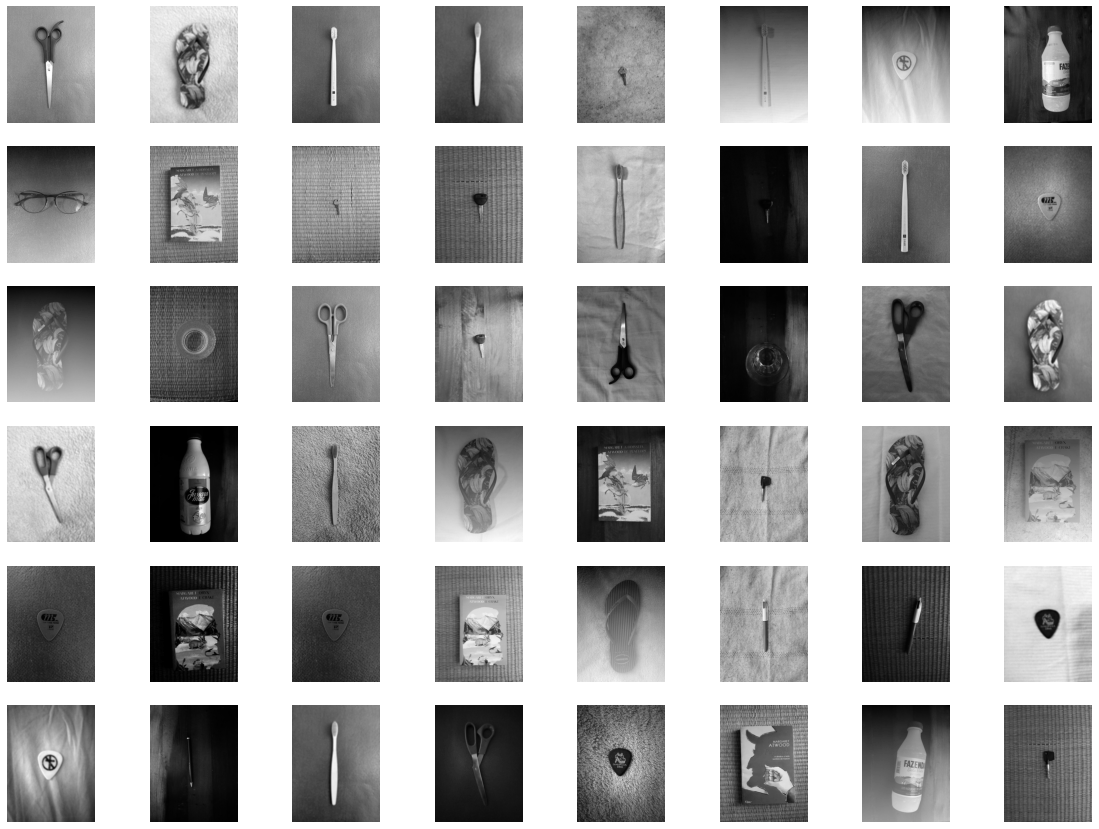

In [15]:
# criar visualização das imagens do augmentedDataSet
fig, axes = plt.subplots(6, 8, figsize=(20,15))
all_imgs = glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*.jpg")
selected_imgs = np.random.choice(all_imgs, 48)

for i in range(48):
    img = io.imread(selected_imgs[i])
    row = i//8
    col = i%8
    axes[row,col].imshow(img, cmap=plt.get_cmap('gray'))
    axes[row,col].set_axis_off()